<a href="https://colab.research.google.com/github/KhaiHoanNinh/bt_AI/blob/main/CIFAR10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

170508288/170498071 [==============================] - 2s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               1573376   
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 256)               65792     
                                                                 
 dropout_2 (Dropout)         (None, 256)               0         
                                                       

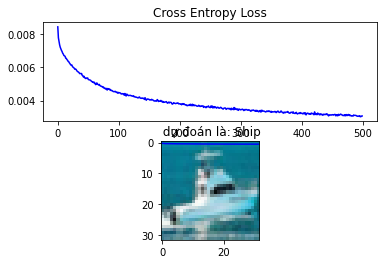

In [ ]:
#CIFAR10
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout,Flatten
from keras.datasets import mnist, fashion_mnist, cifar10, cifar100
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
from keras.utils import np_utils
import cv2
import matplotlib.pyplot as plt
import numpy as np
from tensorflow import keras


(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_pre = x_test
y_ktr = y_test
x_train = x_train.reshape(x_train.shape[0], -1)
x_test = x_test.reshape(x_test.shape[0], -1)

x_train = x_train.astype('float32')   
x_test = x_test.astype('float32')

# đưa giá trị về từ 0-1
x_train /= 255                        
x_test /= 255
y_train = np_utils.to_categorical(y_train, 100)
y_test = np_utils.to_categorical(y_test, 100)
model = Sequential()
model.add(Dense(512, activation='relu', input_shape = (x_train.shape[1],)))
model.add(Dropout(0.1))
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(100,activation='softmax'))
model.summary()

model.compile(loss='mean_squared_error', optimizer =Adam(), metrics=['acc'])
history = model.fit(x_train, y_train, batch_size = 256, epochs = 500, validation_split = 0.2)
#Ve do thi Loss
plt.subplot(211)
plt.title('Cross Entropy Loss')
plt.plot(history.history['loss'], color='blue', label='train')
#Ve do thi Acc
plt.subplot(212)
plt.title('Classification Accuracy')
plt.plot(history.history['acc'], color='blue', label='train')
Label = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

test = 1200

plt.title(" dự đoán là: " + str(Label[np.argmax(model.predict(x_pre[test].reshape(-1,3072)))]))
y_ktr[test]
plt.imshow(x_pre[test], cmap=plt.get_cmap('gray'))
# do chinh xac
k = model.evaluate(x_test, y_test , verbose=0)
print('Sai so kiem tra la:',k[0])
print('Do chinh xac kiem tra', k[1]*100)